In [1]:
import json
import copy
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

with open('../datasets/anno/train.json', 'r') as file:
    train_data = json.load(file)

with open('../datasets/anno/val.json', 'r') as file:
    val_data = json.load(file)


In [2]:
train_data.keys()
train_data["categories"]

[{'supercategroy': 'person', 'id': 0, 'name': 'person'},
 {'supercategroy': 'vehicle', 'id': 1, 'name': 'car'},
 {'supercategroy': 'vehicle', 'id': 2, 'name': 'truck'},
 {'supercategroy': 'vehicle', 'id': 3, 'name': 'bus'},
 {'supercategroy': 'vehicle', 'id': 4, 'name': 'bicycle'},
 {'supercategroy': 'vehicle', 'id': 5, 'name': 'bike'},
 {'supercategroy': 'vehicle', 'id': 6, 'name': 'extra_vehicle'},
 {'supercategroy': 'animal', 'id': 7, 'name': 'dog'}]

In [3]:
train_data["annotations"][-1]
# {'id': 50347,
#  'image_id': 'train_7017',
#  'bbox': [286, 238, 34, 59],
#  'area': 2006,
#  'category_id': 7,
#  'segmentation': [],
#  'iscrowd': 0}

{'id': 50347,
 'image_id': 'train_7017',
 'bbox': [286, 238, 34, 59],
 'area': 2006,
 'category_id': 7,
 'segmentation': [],
 'iscrowd': 0}

In [9]:
total_data = {}
total_data["images"] = copy.deepcopy(train_data["images"])
total_data["images"].extend(val_data["images"])
total_data["annotations"] = copy.deepcopy(train_data["annotations"])

for anno in val_data["annotations"]:
    anno["id"] += 50347
    total_data["annotations"].append(anno)

total_data["categories"] = copy.deepcopy(train_data["categories"])

In [ ]:
with open("/home/eslim/workspace/comp/all_dataset/total.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [10]:
len(total_data["images"])

7618

In [11]:
total_data["annotations"][-1]["id"]

54814

In [12]:
total_data["images"][-1]

{'file_name': 'val_599.png', 'height': 480, 'width': 640, 'id': 'val_599'}

In [13]:
#4,6  -> balancing class


total_data["annotations"][-1]
# for

# total_data["images"][:10]

{'id': 54814,
 'image_id': 'val_599',
 'bbox': [428, 248, 11, 30],
 'area': 330,
 'category_id': 0,
 'segmentation': [],
 'iscrowd': 0}

In [14]:
with open("/home/eslim/workspace/comp/all_dataset/total.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [14]:
# filtered_images=[]
# for info in total_data["annotations"]:
#     if info["category_id"] == 4 or info["category_id"] == 6:
#         filtered_images.append(info["image_id"])

# # filtered_images
# filtered_images = list(set(filtered_images))
# # print(filtered_images)



# extra_annos=[]
# anno_id_num = 1
# for idx,filtered_image in enumerate(filtered_images):
#     for anno_info in total_data["annotations"]:
#         if anno_info["image_id"] != filtered_image:
#             continue
#         copy_anno_info = copy.deepcopy(anno_info)
#         copy_anno_info["id"] = 54814+anno_id_num
#         anno_id_num+=1
#         extra_annos.append(copy_anno_info)
# total_data["annotations"].extend(extra_annos)



In [15]:
# with open("/home/eslim/workspace/comp/all_dataset/total_bal.json", "w") as file:
#     json.dump(total_data, file, indent=4)

In [16]:

# for idx,filtered_image in enumerate(filtered_images):
#     total_data["images"].append({
#         'file_name': filtered_image+".png", 'height': 480, 'width': 640, 'id': 'balancing_'+str(idx)
#     })
# #     total_data["annotations"].append(
# #         {'id': 54814+idx+1,
# #          'image_id': 'balancing_'+str(idx),
# #          'bbox': [428, 248, 11, 30],
# #          'area': 330,
# #          'category_id': 0,
# #          'segmentation': [],
# #          'iscrowd': 0}
# #     )
# # {'id': 54814,
# #  'image_id': 'val_599',
# #  'bbox': [428, 248, 11, 30],
# #  'area': 330,
# #  'category_id': 0,
# #  'segmentation': [],
# #  'iscrowd': 0}



In [13]:
##########FLIR v2 ######## https://www.kaggle.com/datasets/samdazel/teledyne-flir-adas-thermal-dataset-v2
# https://www.flir.com/oem/adas/adas-dataset-form/?srsltid=AfmBOopfUpMyajMTBoctol9RHmoCg42LUbWQ1v4aTdx6DPs1tcwKOqpg

In [17]:
import json
import copy
with open('./all_dataset/anno/extra_pseudo_ann.txt', 'r') as file:
    ext_anno = json.load(file)

# ext_anno


In [18]:
for info in ext_anno:
    print(info)
    break

{'image_id': 'FLIR_00395_jpeg.rf.3319e7a9dd8d6a69a6d3bf5626fba725.jpg', 'category_id': 2, 'bbox': [178.14474487304688, 283.1778869628906, 28.569976806640625, 27.024383544921875], 'score': 0.7372980117797852}


In [19]:
for info in ext_anno:
    total_data["images"].append({'file_name': info["image_id"], 'height': 416, 'width':  416, 'id': info["image_id"].split(".")[-2]})



In [20]:
for idx,info in enumerate(ext_anno):
    try:
        total_data["annotations"].append({'id': 54814+idx+1,
          'image_id': info["image_id"].split(".")[-2],
          'bbox': info["bbox"],
          'area': info["bbox"][2]*info["bbox"][3],
          'category_id': info["category_id"],
          'segmentation': [],
          'iscrowd': 0})
    except:
        print(idx)

In [21]:
with open("/home/eslim/workspace/comp/all_dataset/anno/total_pseudo.json", "w") as file:
    json.dump(total_data, file, indent=4)


In [ ]:
################################################################################

In [15]:
import json
import copy
with open('./all_dataset/roboflow_data/train/_annotations.coco.json', 'r') as file:
    ext_train_data = json.load(file)

with open('./all_dataset/roboflow_data/valid/_annotations.coco.json', 'r') as file:
    ext_val_data = json.load(file)

{'id': 236, 'image_id': 28, 'category_id': 1, 'bbox': [340, 212, 33, 63.5], 'area': 2095.5, 'segmentation': [], 'iscrowd': 0}
./all_dataset/roboflow_data/train/FLIR_02547_jpeg.rf.945fb7fb67654641c09e02d70d93b4f0.jpg
(340, 212, 373, 275.5)


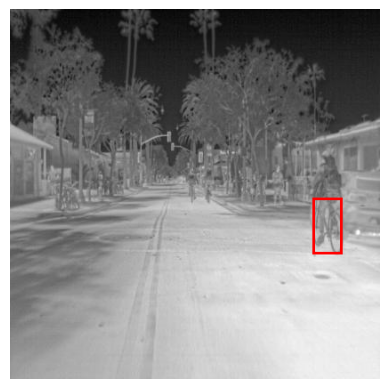

In [16]:
for idx,info in enumerate(ext_train_data["annotations"]):
    if info["category_id"] == 1 and idx >100:
#         image_path = f'./radar/extra/train/{info["image_id"]}.png'
        file_name = ext_train_data["images"][info["image_id"]]["file_name"]
#         print(ext_train_data["images"][info["category_id"]["image_id"]])
#         file_name = ext_train_data["images"][info["category_id"]["image_id"]]
        image_path = f'./all_dataset/roboflow_data/train/{file_name}'
        bbox = info["bbox"]
        print(info)
        break
print(image_path)
# 이미지 불러오기
image = Image.open(image_path)
bbox = (info["bbox"][0],info["bbox"][1],info["bbox"][0]+info["bbox"][2],info["bbox"][1]+info["bbox"][3])
# # # 바운딩 박스 좌표 설정 (왼쪽 위 모서리 x, 왼쪽 위 모서리 y, 오른쪽 아래 모서리 x, 오른쪽 아래 모서리 y)
# # bbox = (50, 50, 200, 200)  # 예시 좌표, 원하는 좌표로 변경
print(bbox)
# # 이미지에 바운딩 박스 그리기
draw = ImageDraw.Draw(image)
draw.rectangle(bbox, outline="red", width=3)  # 바운딩 박스 색상은 빨강, 두께는 3픽셀

# # 이미지를 Jupyter Notebook에서 표시
plt.imshow(image)
plt.axis('off')  # 축을 숨깁니다
plt.show()

# bicycle -> motorcycle같음

In [17]:
from mmengine import ConfigDict
from mmengine.config import Config, DictAction
import os

cfg = Config.fromfile('./mmdetection/configs/yolox/mymodel.py')
cfg.model = ConfigDict(**cfg.tta_model, module=cfg.model)
cfg.test_dataloader.dataset.pipeline = cfg.tta_pipeline
from mmdet.apis import DetInferencer


# checkpoint = "./work_dirs/yolox/extra/epoch_290.pth"
checkpoint = "./mmdetection/work_dirs/yolox/total/epoch_240.pth"

#42000

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(cfg, checkpoint, device)
# result = inferencer(os.path.join(test_dir_prefix,image_dir))

for idx,info in enumerate(ext_train_data["annotations"]):
#     if info["category_id"] == 1 and idx >100:
#         image_path = f'./radar/extra/train/{info["image_id"]}.png'
#         file_name = ext_train_data["images"][info["image_id"]]["file_name"]
#         print(ext_train_data["images"][info["category_id"]["image_id"]])
#         file_name = ext_train_data["images"][info["category_id"]["image_id"]]
        image_path = f'./all_dataset/roboflow_data/train/{file_name}'
        result = inferencer(image_path)
#         bbox = info["bbox"]
        print(result)
        break

# bicycle -> motorcycle같음

Loads checkpoint by local backend from path: ./mmdetection/work_dirs/yolox/total/epoch_240.pth


FileNotFoundError: ./mmdetection/work_dirs/yolox/total/epoch_240.pth can not be found.

In [19]:
ext_train_data.keys()
# ext_train_data["annotations"]
ext_train_data["images"]
# ext_train_data["categories"]

[{'id': 0,
  'license': 1,
  'file_name': 'FLIR_01322_jpeg.rf.94100a0115209ed618a6ab6ada9eae8c.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2023-10-16T08:41:20+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': 'FLIR_00009_jpeg.rf.9453e2b9e9297a6a7efd20a504769628.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2023-10-16T08:41:20+00:00'},
 {'id': 2,
  'license': 1,
  'file_name': 'FLIR_00626_jpeg.rf.9445bebbfa63478e8bf6ef01ba6d3e8f.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2023-10-16T08:41:20+00:00'},
 {'id': 3,
  'license': 1,
  'file_name': 'FLIR_08085_jpeg.rf.948de54887d250e404539ba286a40bdc.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2023-10-16T08:41:20+00:00'},
 {'id': 4,
  'license': 1,
  'file_name': 'FLIR_03819_jpeg.rf.93e6565657c2ccd1b8cc5f5b0d675164.jpg',
  'height': 416,
  'width': 416,
  'date_captured': '2023-10-16T08:41:20+00:00'},
 {'id': 5,
  'license': 1,
  'file_name': 'FLIR_06072_jpeg.rf.94252213430d33f99465e90

In [17]:
# ext_val_data["annotations"]

In [18]:
__MAP__ = {
    1:4,
    2:1,
    3:0,

}



In [19]:
ext_train_data["annotations"][-1]

{'id': 67604,
 'image_id': 8859,
 'category_id': 2,
 'bbox': [386, 190, 29, 26],
 'area': 754,
 'segmentation': [],
 'iscrowd': 0}

In [20]:
for info in ext_train_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext_t_"+str(info["id"])})



for info in ext_val_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext_v_"+str(info["id"])})


In [21]:
for idx,info in enumerate(ext_train_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 54814+info["id"]+1,
              'image_id': "ext_t_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [22]:
total_data["annotations"][-1]["id"]


122419

In [23]:
for idx,info in enumerate(ext_val_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 122419+info["id"]+1,
              'image_id': "ext_v_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [24]:
total_data["annotations"][-1]["id"]


134096

In [25]:
total_data["images"][-10:]

[{'file_name': 'FLIR_10055_jpeg.rf.fca8a33787eb4d0a3290dcbb82b97aaf.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1355'},
 {'file_name': 'FLIR_09900_jpeg.rf.fcc0c4d04d7634fb52e98816420c9a89.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1356'},
 {'file_name': 'FLIR_09602_jpeg.rf.fccafd1c052906ccf6c78dba432cd7a5.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1357'},
 {'file_name': 'FLIR_10000_jpeg.rf.fedcce868b1155b697fb25bccaa9e114.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1358'},
 {'file_name': 'FLIR_09527_jpeg.rf.fe81153f21a2591196cfcdbd0eeb365e.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1359'},
 {'file_name': 'FLIR_09102_jpeg.rf.ff2ebb0feec9d8aa8094b141f92dd346.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1360'},
 {'file_name': 'FLIR_09007_jpeg.rf.ff78eb30994dbe6c262d8fdce5ed7589.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1361'},
 {'file_name': 'FLIR_09600_jpeg.rf.ff366eb8ff1aba1c2be7985446454e6c.jpg',
  'height': 416,

In [26]:
# total_data["annotations"][-100:]

In [28]:
with open("/home/eslim/workspace/comp/all_dataset/total_extra.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [ ]:
###############v7

In [ ]:
import json
import copy
with open('./radar/extra/v7/train/_annotations.coco.json', 'r') as file:
    ext2_train_data = json.load(file)

with open('./radar/extra/v7/valid/_annotations.coco.json', 'r') as file:
    ext2_val_data = json.load(file)

In [ ]:
ext2_train_data.keys()
# ext2_train_data["images"]
ext2_train_data["categories"]
# ext2_train_data["annotations"]

In [ ]:
__MAP__ = {
    1:4,
    2:1,
    3:7,
    4:0,
}


In [ ]:
for info in ext_train_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext2_t_"+str(info["id"])})



for info in ext_val_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext2_v_"+str(info["id"])})


In [ ]:
for idx,info in enumerate(ext_train_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 134096+info["id"]+1,
              'image_id': "ext2_t_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [ ]:
total_data["annotations"][-1]["id"]

In [ ]:
for idx,info in enumerate(ext_val_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 201701+info["id"]+1,
              'image_id': "ext2_v_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [ ]:
total_data["annotations"][-1]["id"]

In [ ]:
with open("/home/eslim/workspace/comp/radar/datasets/total_extra_2.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [ ]:
# [{'supercategroy': 'person', 'id': 0, 'name': 'person'},
#  {'supercategroy': 'vehicle', 'id': 1, 'name': 'car'},
#  {'supercategroy': 'vehicle', 'id': 2, 'name': 'truck'},
#  {'supercategroy': 'vehicle', 'id': 3, 'name': 'bus'},
#  {'supercategroy': 'vehicle', 'id': 4, 'name': 'bicycle'},
#  {'supercategroy': 'vehicle', 'id': 5, 'name': 'bike'},
#  {'supercategroy': 'vehicle', 'id': 6, 'name': 'extra_vehicle'},
#  {'supercategroy': 'animal', 'id': 7, 'name': 'dog'}]



#   "categories": [
#     {
#       "id": 1,
#       "name": "bicycle"
#     },
#     {
#       "id": 2,
#       "name": "car"
#     },
#     {
#       "id": 3,
#       "name": "person"
#     }
#   ],